In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os


In [10]:
data_path = "/Users/abhishekkumar/Documents/MS_UB/Fall_18/ESL506_StatisticalDataMiningI/Project/SIGNATE/test_and_train_data/Nikko/"

train = pd.read_table(os.path.join(data_path,"nikko_train.csv")).drop(['Unnamed: 0', 'epark'], axis =1)
test = pd.read_table(os.path.join(data_path,"nikko_test_weather.csv")).drop(['serial_number', 'epark'], axis =1)

In [23]:
def run_model(model,dtrain,predictor_var,target,scoring_method='mean_squared_error'):
#For cross-validation
    cv_method = KFold(len(dtrain),5)
    cv_scores = cross_val_score(model,dtrain[predictor_var],dtrain[target],cv=cv_method,scoring=scoring_method)
    print (cv_scores, np.mean(cv_scores), np.sqrt((-1)*np.mean(cv_scores)))
    
    dtrain_for_val = dtrain[dtrain['Year']<2000]
    dtest_for_val = dtrain[dtrain['Year']>1999]
    cv_method = KFold(len(dtrain_for_val),5)
    cv_scores_2 = cross_val_score(model,dtrain_for_val[predictor_var],dtrain_for_val[target],cv=cv_method,scoring=scoring_method)
    print (cv_scores_2, np.mean(cv_scores_2))
    
    dtrain_for_val_ini = dtrain_for_val[predictor_var]
    dtest_for_val_ini = dtest_for_val[predictor_var]
    model.fit(dtrain_for_val_ini,dtrain_for_val[target])
    pred_for_val = model.predict(dtest_for_val_ini)
        
    print (math.sqrt(mean_squared_error(dtest_for_val['Footfall'],pred_for_val)))

    
def generate_csv(model,dtrain,dtest,predictor_var,target,filename): #Generation of Solution file
    dtrain_ini = dtrain[predictor_var]
    model.fit(dtrain_ini,dtrain[target])
    dtest_ini = dtest[predictor_var]
    pred = model.predict(dtest_ini)
    test_for_sub = pd.read_csv('test.csv')
    test_for_sub[target] = 0
    i = 0
    for index,row in test_for_sub.iterrows():
        test_for_sub.set_value(index,target,pred[i])
        i+=1
    test_for_sub.to_csv(filename,columns=('ID',target),index=False)
    
def writetotest(model,dtrain,dtest,predictor_var,target,filename): #Generation of Solution file
    test_for_sub = pd.read_csv('test.csv')
    test_for_sub[target] = 0
    i = 0
    for index,row in test_for_sub.iterrows():
        test_for_sub.set_value(index,target,pred[i])
        i+=1
    test_for_sub.to_csv(filename,columns=('ID',target),index=False)

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])

#Creating new features with datetime
train_df["dayofweek"] = train['datetime'].dt.dayofweek
train_df["dayofweek"] = train_df["dayofweek"].astype('object')
train_df["month"] = train['datetime'].dt.month
train_df["month"] = train_df["month"].astype('object')
train_df["year"] = train['datetime'].dt.year
train_df["year"] = train_df["year"].astype('object')
train_df["day"] = train['datetime'].dt.day
train_df["day"] = train_df["day"].astype('object')

In [12]:
test.columns

Index(['index', 'datetime', 'Average temperature (℃)',
       'Total precipitation (mm)', 'Total snowfall (cm)',
       'Average wind speed (m/s)', 'Average vapor pressure (hPa)',
       'Average local atmospheric pressure (hPa)', 'Average humidity (%)'],
      dtype='object')

In [19]:
akhil_train = pd.read_csv('/Users/abhishekkumar/Documents/MS_UB/Fall_18/ESL506_StatisticalDataMiningI/Project/AkhilPark/train.csv.txt')
akhil_test = pd.read_csv('/Users/abhishekkumar/Documents/MS_UB/Fall_18/ESL506_StatisticalDataMiningI/Project/AkhilPark/test.csv.txt')



/Users/abhishekkumar/anaconda3/envs/signate/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


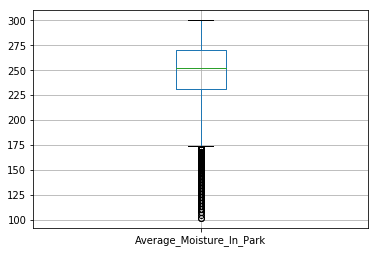

In [22]:
akhil_train["Average_Moisture_In_Park"].plot.box(grid='True')

In [21]:
akhil_test.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type
0,3725712,12,01-01-2002,233.0,55.48,76.0,38.0,0.0249,8259.0,8300.0,8211.0,260.0,316.0,243.0,285.0,210.0,3
1,3725812,12,02-01-2002,211.0,108.68,152.0,60.8,154.3800,8208.0,8294.0,8136.0,120.0,280.0,252.0,291.0,201.0,3
2,3725912,12,03-01-2002,237.0,95.76,121.6,83.6,34.8600,8252.0,8304.0,8146.0,236.0,292.0,234.0,270.0,207.0,3
3,3726012,12,04-01-2002,286.0,101.08,129.2,83.6,34.0300,8146.0,8249.0,8092.0,204.0,284.0,228.0,264.0,201.0,3
4,3726112,12,05-01-2002,281.0,63.08,83.6,45.6,4.9800,8341.0,8376.0,8259.0,144.0,316.0,237.0,279.0,213.0,3
